In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac

In [23]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

### Importing in targets from ExoPlots

https://ethankruse.github.io/exoplots/insolation-radius.html

In [13]:
l1 = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/radius_iso_cut.csv',skiprows=1,
                 names=['Planet','Insolation','Period','Radius','Jup_Radius','Discovery','Status'])
l1

,Planet,Insolation,Period,Radius,Jup_Radius,Discovery,Status
0,Kepler-452 b,1.108504,384.843000,1.568324,0.139904,Kepler,Confirmed
1,Kepler-1649 c,0.942183,19.535270,1.069217,0.095381,Kepler,Confirmed
2,Kepler-1544 b,0.774587,168.811174,1.722270,0.153637,Kepler,Confirmed
3,Kepler-1410 b,1.060000,60.866168,1.780000,0.158787,Kepler,Confirmed
4,Kepler-296 f,0.620000,63.336270,1.800000,0.160571,Kepler,Confirmed
5,Kepler-283 c,0.966398,92.743711,1.944526,0.173464,Kepler,Confirmed
6,Kepler-62 f,0.509360,267.291000,1.533375,0.136786,Kepler,Confirmed
7,Kepler-442 b,1.007496,112.305300,1.375733,0.122724,Kepler,Confirmed
8,Kepler-1652 b,0.810000,38.097220,1.600000,0.142730,Kepler,Confirmed
9,Kepler-186 f,0.404084,129.944100,1.201500,0.107181,Kepler,Confirmed


In [32]:
kepler = l1[l1["Discovery"].str.contains("Kepler")]
k2 = l1[l1["Discovery"].str.contains("K2")]
tess = l1[l1["Discovery"].str.contains("TESS")]
other = l1[l1["Discovery"].str.contains("Mulitple Observatories|MEarth Project|La Silla Observatory|SPECULOOS Southern Observatory")]

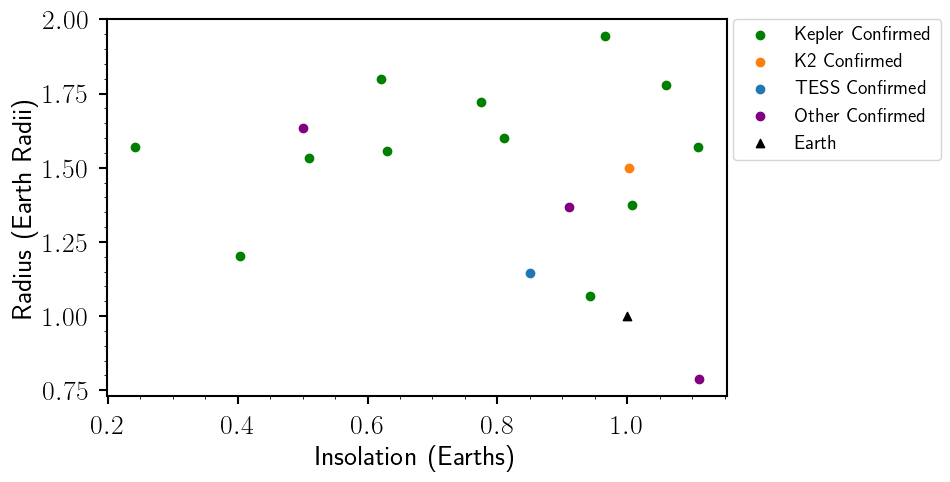

In [51]:
#plt.scatter(l1['Insolation'].values,l1['Radius'].values)
plt.scatter(kepler['Insolation'].values,kepler['Radius'].values,color = 'green', label = "Kepler Confirmed")
plt.scatter(k2['Insolation'].values,k2['Radius'].values,color = 'C1', label = "K2 Confirmed")
plt.scatter(tess['Insolation'].values,tess['Radius'].values,color = 'C0', label = "TESS Confirmed")
plt.scatter(other['Insolation'].values,other['Radius'].values,color = 'purple', label = "Other Confirmed")
plt.scatter(1,1,color='k',label='Earth',marker="^")


plt.xlabel('Insolation (Earths)')
plt.ylabel('Radius (Earth Radii)')
plt.tick_params(direction='out',width=1.5,length=6,pad=7)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.,fontsize=14)